我这边是每一次run必须使用下面这一块，否则显示level0错误

In [145]:
import importlib
import EconomicIndicator
import DataProcess
importlib.reload(EconomicIndicator)
importlib.reload(DataProcess)

<module 'DataProcess' from 'E:\\Xiaotong\\UIUC\\FA24\\IS597\\HW\\Project\\2024Fall_projects_Olympic_Effect\\DataProcess.py'>

## Economic Indicator

In [137]:
from DataProcess import preprocess_csv_type1
from DataProcess import preprocess_csv_type2
from DataProcess import preprocess_csv_type3

In [138]:
AUS_GDP = preprocess_csv_type1(
    file_path='data/australia-gdp-gross-domestic-product.csv',
    date_column='Date',
    year_column='Date',
    year_range=(1995, 2005),
    skip_rows=7
)

CHI_GDP = preprocess_csv_type1(
    file_path='data/China-gdp.csv',
    date_column='DATE',
    year_column='DATE',
    year_range=(2003, 2013),
    value_column='MKTGDPCNA646NWDB',
    skip_rows=0,
    convert_to_billion=True,
    column_label='GDP'
)


print(AUS_GDP.head())
print(CHI_GDP.head())

    Date  GDP (Billions of US $)  Per Capita (US $)  Annual % Change
35  1995              368.166023         20448.1220           3.8832
36  1996              401.341881         22021.7839           3.8639
37  1997              435.642611         23646.6230           3.9132
38  1998              399.674422         21479.1142           4.6633
39  1999              389.652212         20712.6698           5.0276
    DATE          GDP
43  2003  1660.280544
44  2004  1955.346769
45  2005  2285.961150
46  2006  2752.118657
47  2007  3550.327803


In [146]:
from EconomicIndicator import index_rename_and_calculate_growth_rate
from EconomicIndicator import growth_rate_plot
from EconomicIndicator import two_subplots

In [140]:
# Set index to continuous int
# Find out the 2 csv have different names for 'Date' column & 'GDP' column, rename it.
# Sometimes the strip doesn't work in DataProcess, need to check
# Calculate growth rate per year
cleaned_df1 = index_rename_and_calculate_growth_rate(
    df=AUS_GDP,
    rename_dict=
        {'Date': 'Year', 'GDP (Billions of US $)': 'GDP'},
    host_year=2000,
    metric_column='GDP')

cleaned_df2 = index_rename_and_calculate_growth_rate(
    df=CHI_GDP,
    rename_dict=
        {'DATE': 'Year', 'GDP (Billion)': 'GDP'},
    host_year=2008,
    metric_column='GDP')

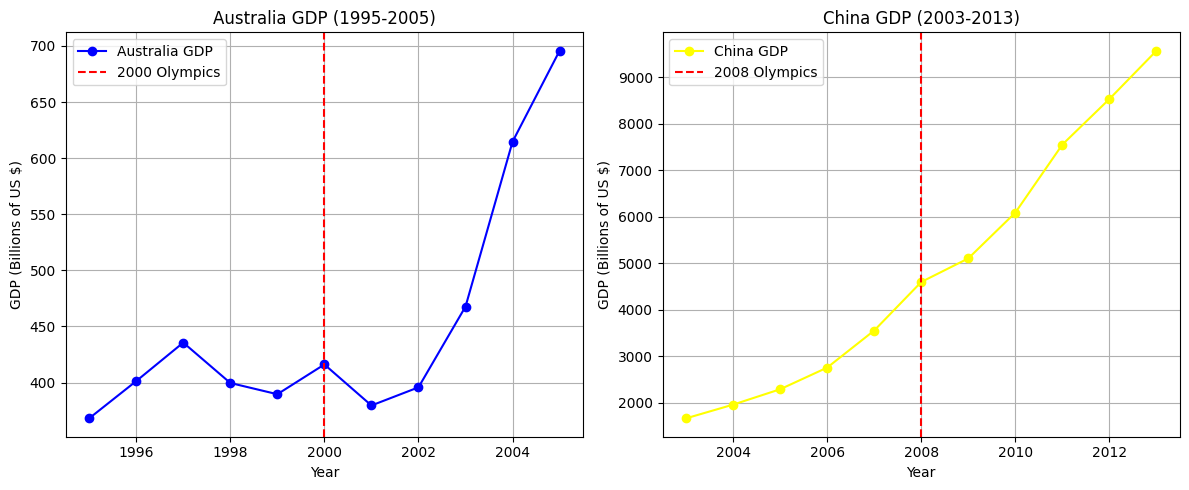

In [141]:
two_subplots(
    df1=cleaned_df1,
    host_year1=2000,
    legend1="Australia GDP",
    title1="Australia GDP (1995-2005)",
    df2=cleaned_df2,
    host_year2=2008,
    legend2="China GDP",
    title2="China GDP (2003-2013)",
    x_column='Year',
    y_column='GDP',
    xlabel="Year",
    ylabel="GDP (Billions of US $)",
)

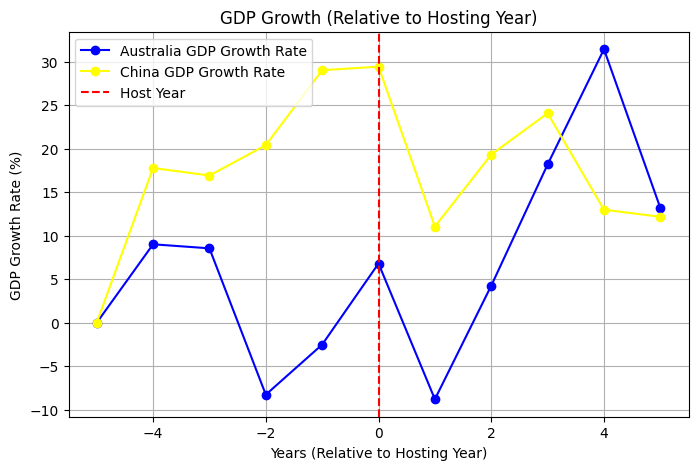

In [142]:
growth_rate_plot(
    dfs=[cleaned_df1,cleaned_df2], 
    countries=['Australia', 'China'], 
    metric='GDP',
    colors=None
)

In [143]:
AUS_FDI = preprocess_csv_type3(
        file_path='data/Foreign_Direct _Investment.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995,2005),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='FDI'
    )


CHI_FDI = preprocess_csv_type3(
        file_path='data/Foreign_Direct _Investment.csv',
        country_column='Country Name',
        countries=['China'],
        year_column='Year',
        year_range=(2003,2013),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='FDI'
    )

print(AUS_FDI.head())  # test success
print(CHI_FDI.head())  # test success

   Country Name  Year        FDI
35    Australia  1995  13.268875
36    Australia  1996   4.563952
37    Australia  1997   8.088069
38    Australia  1998   7.597611
39    Australia  1999   2.210918
   Country Name  Year         FDI
43        China  2003   57.900937
44        China  2004   68.117272
45        China  2005  104.108694
46        China  2006  124.082036
47        China  2007  156.249335


In [147]:
cleaned_df1_FDI = index_rename_and_calculate_growth_rate(
    df=AUS_FDI,
    rename_dict=None,
    host_year=2000,
    metric_column='FDI')

cleaned_df2_FDI = index_rename_and_calculate_growth_rate(
    df=CHI_FDI,
    rename_dict=None,
    host_year=2008,
    metric_column='FDI')

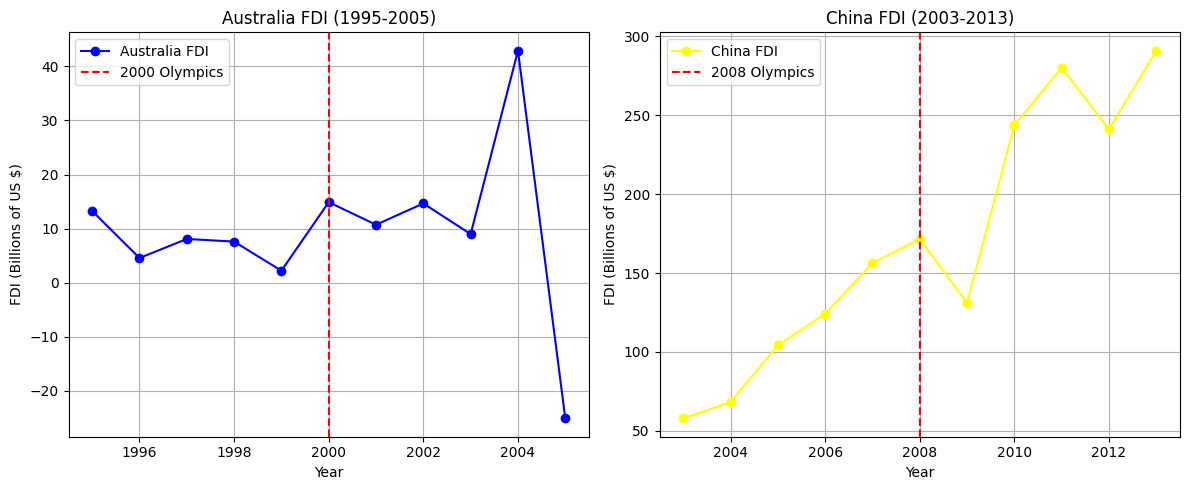

In [148]:
two_subplots(
    df1=cleaned_df1_FDI,
    host_year1=2000,
    legend1="Australia FDI",
    title1="Australia FDI (1995-2005)",
    df2=cleaned_df2_FDI,
    host_year2=2008,
    legend2="China FDI",
    title2="China FDI (2003-2013)",
    x_column='Year',
    y_column='FDI',
    xlabel="Year",
    ylabel="FDI (Billions of US $)",
)

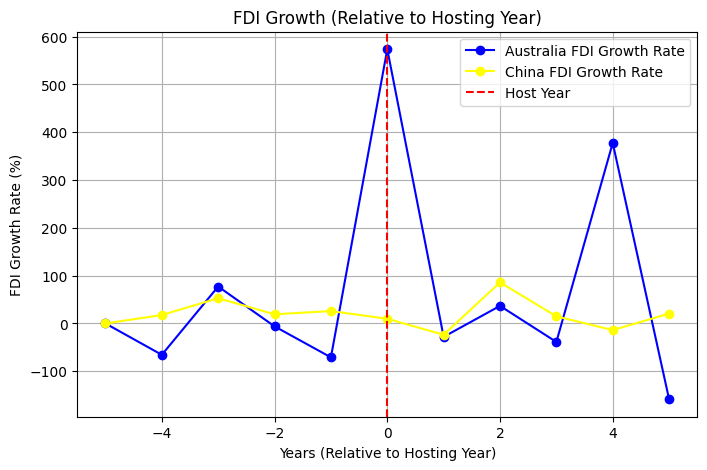

In [149]:
growth_rate_plot(
    dfs=[cleaned_df1_FDI,cleaned_df2_FDI], 
    countries=['Australia', 'China'], 
    metric='FDI',
    colors=None
)